In [65]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from pylab import *


In [66]:
#import the xyz files and get the atoms in a list
CO_O_TS_Ru = pd.read_csv('CO_O_TS_Ru.csv', sep=',', header=None)
print(CO_O_TS_Ru.values)

[[0.004928044 0.9881642359999999 0.821257795 'Ru']
 [0.33925398 0.983108415 0.8223738979999999 'Ru']
 [0.6778821840000001 0.983245782 0.821765454 'Ru']
 [0.003902693 0.23674130899999998 0.821026363 'Ru']
 [0.341646492 0.231794423 0.827562472 'Ru']
 [0.678005703 0.235705067 0.8198206729999999 'Ru']
 [0.00177607 0.48931265399999996 0.8194660579999999 'Ru']
 [0.34131562299999996 0.49326183100000004 0.826976424 'Ru']
 [0.677032565 0.487439086 0.821045027 'Ru']
 [0.00367506 0.7396552959999999 0.8198020090000001 'Ru']
 [0.33806087100000004 0.7413039109999999 0.8206306870000001 'Ru']
 [0.671305789 0.7383305720000001 0.8209965 'Ru']
 [0.341146028 0.244008545 0.89818679 'C']
 [0.343516547 0.22349302699999998 0.94052032 'O']
 [0.328518255 0.461988137 0.8949168690000001 'O']]


In [67]:
# Brilliant.  Moving on.  
# Get the lattice vectors.
lattice_vectors = pd.read_csv('lattice_vectors.csv', sep=',', header=None)
print(lattice_vectors.values)


[[ 8.31557575  0.          0.        ]
 [ 5.54371717  9.60199979  0.        ]
 [ 0.          0.         26.78963917]]


In [68]:
# Convert to Angstroms instead of fractions of the unit cell vectors.
# An N-atom by 3 matrix times 3x3 lattice matrix yields an Nx3 matrix.
CO_O_TS_Ru_angs=np.matmul(CO_O_TS_Ru.iloc[:, 0:3],lattice_vectors)
CO_O_TS_Ru_angs = np.array(CO_O_TS_Ru_angs)
print(CO_O_TS_Ru_angs)

[[ 5.51908256  9.48835279 22.00119999]
 [ 8.27116716  9.4398068  22.03109999]
 [11.08781717  9.44112579 22.0148    ]
 [ 1.34488     2.27319    21.99500001]
 [ 4.12599     2.22569    22.17010002]
 [ 6.94469001  2.26324    21.96270001]
 [ 2.72738     4.69838    21.95320001]
 [ 5.57274     4.7363     22.1544    ]
 [ 8.33214001  4.68039    21.99550002]
 [ 4.131       7.10217    21.96220001]
 [ 6.92075     7.118      21.9844    ]
 [ 9.67539     7.08945    21.99419999]
 [ 4.18954     2.34297    24.06210001]
 [ 4.09552     2.14598    25.1962    ]
 [ 5.29295     4.43601    23.97450001]]


In [69]:
#Ready to start iterating?
vertices = np.array([[ 8.31557575,  0.,          0.        ],
                     [ 5.54371717,  9.60199979,  0.        ],
                     [ 0.,          0.,         26.78963917],
                     [ 0.,          0.,          0.        ],
                     [ 13.85929292, 9.60199979,  0.        ],
                     [ 5.54371717,  9.60199979, 26.78963917],
                     [ 8.31557575,  0.,         26.78963917],
                     [ 13.85929292, 9.60199979, 26.78963917]])
print(vertices)

[[ 8.31557575  0.          0.        ]
 [ 5.54371717  9.60199979  0.        ]
 [ 0.          0.         26.78963917]
 [ 0.          0.          0.        ]
 [13.85929292  9.60199979  0.        ]
 [ 5.54371717  9.60199979 26.78963917]
 [ 8.31557575  0.         26.78963917]
 [13.85929292  9.60199979 26.78963917]]


In [70]:
# Atomic mass of Ru: 101.07
# Atomic mass C: 12.011
# Atomic mass O: 15.999
# Total atomic mass of cluster: 
total_mass = 101.07*12 + 12.011 + 15.999*2

In [71]:
CO_O_TS_Ru = np.array(CO_O_TS_Ru)
V_ext_oper = np.zeros((len(vertices),len(vertices)))
for i in range(len(vertices)):
    V_ext = 0
    for j in range(len(CO_O_TS_Ru_angs)):
        distance = np.sum(np.power(CO_O_TS_Ru_angs[j,:] - vertices[i,:],2))
        element = CO_O_TS_Ru[j,3]
        if element == 'Ru':
            charge = 101.07/total_mass
        elif element == 'C':
            charge = 12.011/total_mass
        elif element == 'O':
            charge = 15.999/total_mass
        else:
            charge = 0.0
        V_ext = V_ext + charge/distance
    V_ext_oper[i,i] = V_ext

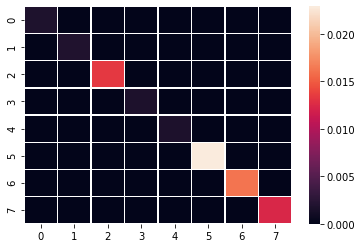

In [72]:
fig = sns.heatmap(V_ext_oper, linewidth=0.5)
plt.savefig('CO_O_TS_Ru_V_ext.png',dpi=300)

In [73]:
# Great!  Now, move on to the kinetic energy.  
# The kinetic energy matrix will also be diagonal.
# There is one kinetic energy at each spatial point.
# It is a first derivative.

In [74]:
E_kin_oper = np.zeros((len(vertices),len(vertices)))

for i in range(len(vertices)):
    V_kin = 0
    #Obtain the distance from one vertex to the next.
    if i < len(vertices) - 1: # valid up until the next to last index
        distance = np.sum(np.power(vertices[i+1,:] - vertices[i,:],2))
    elif i == len(vertices) - 1: # At the last index we have to hop around to the start.
        distance = np.sum(np.power(vertices[0,:] - vertices[i,:],2))
    V_kin = 1/(2*distance)
    if i < len(vertices) - 1: # valid up until the next to last index
        E_kin_oper[i,i] = V_kin
        E_kin_oper[i+1,i+1] = -V_kin #putting in the finite difference
    elif i == len(vertices) - 1:
        E_kin_oper[i,i] = V_kin
        E_kin_oper[0,0] = -V_kin
        

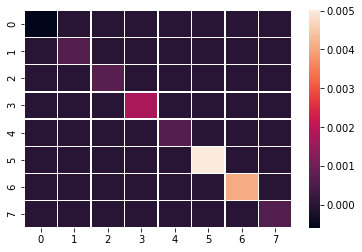

In [75]:
fig = sns.heatmap(E_kin_oper, linewidth=0.5)
plt.savefig('CO_O_TS_Ru_E_kin.png',dpi=300)

In [76]:
V_e_e_oper = np.zeros((len(vertices),len(vertices)))
for i in range(len(vertices)):
    for j in range(len(vertices)):
        if i != j:
            distance = np.sum(np.power(vertices[i,:] - vertices[j,:],2))
            V_e_e_oper[i,j] = 1/distance


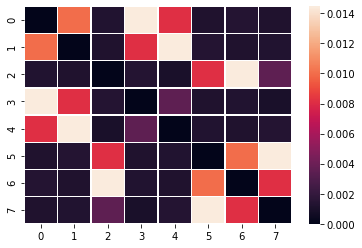

In [77]:
fig = sns.heatmap(V_e_e_oper, linewidth=0.5)
plt.savefig('CO_O_TS_Ru_V_e_e.png',dpi=300)

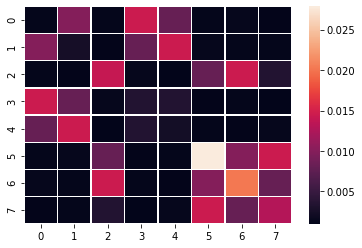

In [78]:
H_oper = V_ext_oper + E_kin_oper + V_e_e_oper
fig = sns.heatmap(H_oper, linewidth=0.5)
plt.savefig('CO_O_TS_Ru_H.png',dpi=300)

In [79]:
w, v = np.linalg.eig(H_oper)
print('eigenvalues: ',w)


eigenvalues:  [ 0.05120892  0.03075544 -0.01360521 -0.01170621  0.01870655  0.00547101
  0.00301792  0.00093973]


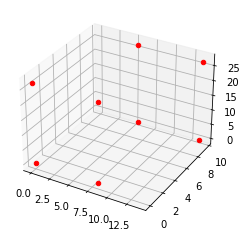

In [80]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# plotting the points
for p in vertices:
    ax.scatter(p[0], p[1], p[2], zdir='z', c='r')


[-0.02026515 -0.05004229  0.90853235 -0.00607082 -0.05267474 -0.99573127
  1.         -0.56019447]
[-0.02026515 -0.05004229  0.90853235 -0.00607082 -0.05267474 -0.99573127
  1.         -0.56019447]


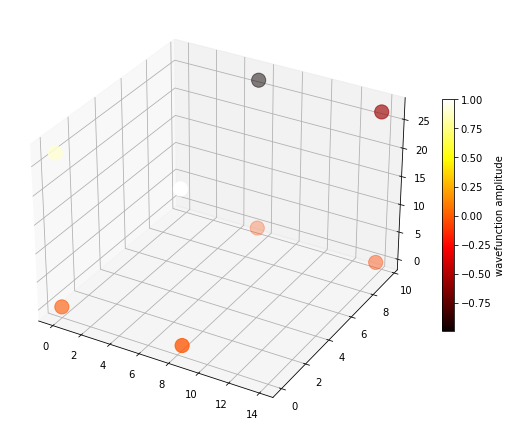

In [81]:

#fig = plt.figure(figsize=(8,6))

#ax = fig.add_subplot(111,projection='3d')
#colmap = cm.ScalarMappable(cmap=cm.hsv)
#colmap.set_array(v[:,4])

#print(v[:,4])
#print(max(v[:,4]))
#colors = cm.hsv(v[:,4]/max(v[:,4]))
#print(colors)

#yg = ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c=colors, marker='o')
#cb = fig.colorbar(colmap)

# creating figures
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

# setting color bar
#color_map = cm.ScalarMappable(cmap=cm.hot)
#color_map.set_array(v[:,4]/max(v[:,4]))
colors = v[:,4]/max(v[:,4])

print(v[:,4]/max(v[:,4]))
print(colors)

# creating the heatmap
map_1 = ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c = colors,cmap='hot',s=200)

cbar = plt.colorbar(map_1,fraction=0.026, pad=0.04)
cbar.set_label('wavefunction amplitude')
plt.show()
fig.savefig('CO_O_TS_Ru_wavefunc.png',dpi=300)